#### 주제: 분류 모델로 와인 품질 예측
- 자료 출처: https://www.kaggle.com/datasets/rajyellow46/wine-quality

In [249]:
# 모듈 생성
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import all_estimators
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [389]:
import warnings

warnings.filterwarnings(action='ignore')

방법 1. 원래 데이터

1. 데이터 로딩 및 확인

In [564]:
wineDf = pd.read_csv('./data/winequality.csv')

In [565]:
wineDf.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


2. 데이터 전처리

In [566]:
# 결측치 확인
wineDf.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [567]:
# 결측치 제거
wineDf = wineDf.dropna(axis=0, how='any')

In [568]:
# 다시 결측치 확인
wineDf.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [569]:
# type -> white:0, red:1로 변환
wineDf['type'] = wineDf['type'].map({'white':0, 'red':1}).astype(int)

In [570]:
# 확인
wineDf.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [571]:
data = wineDf.iloc[:,:-1]
target = wineDf.quality

3. 데이터 시각화 - 와인 품질 분포

In [366]:
white = wineDf[wineDf.type==0]
red = wineDf[wineDf.type==1]

In [367]:
white_target = white.quality
red_target = red.quality

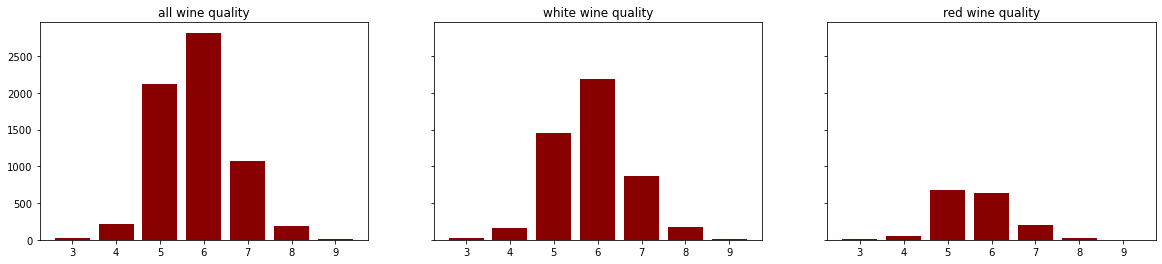

In [369]:
# 전체 subplot의 개수 설정 (1x3=총3개)
fig, axes=plt.subplots(1,3, figsize=(20,4), sharex=True,sharey=True)
plt.subplot(1,3,1)
plt.title('all wine quality')
plt.bar(target.value_counts().index, target.value_counts(), color='#880000')
plt.subplot(1,3,2)
plt.title('white wine quality')
plt.bar(white_target.value_counts().index, white_target.value_counts(), color='#880000')
plt.subplot(1,3,3)
plt.title('red wine quality')
plt.bar(red_target.value_counts().index, red_target.value_counts(), color='#880000')
plt.show()

4. 학습/테스트 데이터 준비

In [350]:
# 학습:8, 테스트:2
train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.2, random_state=42)

In [351]:
train_X.shape, test_X.shape

((5170, 12), (1293, 12))

5. 최적의 모델 찾기

In [352]:
models = all_estimators(type_filter='classifier')
scores = []
names = []

for name, model in models:
    try:
        # 모델 객체 생성
        md = model()
        # 학습
        md.fit(train_X, train_y)
        # 평가
        result1 = md.score(train_X, train_y)
        result2 = md.score(test_X, test_y)
        names.append(name)
        scores.append((name, np.round(result1,3), np.round(result2,3)))
    except:
        pass

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge

In [370]:
scoresDf = pd.DataFrame(scores, columns=['model', 'train_score', 'test_score'])
scoresDf.head()

,model,train_score,test_score
0,AdaBoostClassifier,0.345,0.370
1,BaggingClassifier,0.987,0.634
2,BernoulliNB,0.447,0.428
3,CalibratedClassifierCV,0.525,0.509
4,CategoricalNB,0.565,0.506


In [434]:
scoresDf.sort_values(by='test_score', ascending=False).head()

,model,train_score,test_score
9,ExtraTreesClassifier,1.000,0.678
27,RandomForestClassifier,1.000,0.667
13,HistGradientBoostingClassifier,0.977,0.646
1,BaggingClassifier,0.987,0.634
12,GradientBoostingClassifier,0.715,0.578


- 엑스트라트리 분류 모델

In [324]:
from sklearn.ensemble import ExtraTreesClassifier

[1] 모델 생성 및 학습

In [374]:
extModel = ExtraTreesClassifier(random_state=42)
extModel.fit(train_X, train_y)

ExtraTreesClassifier(random_state=42)

[2] 모델 평가

In [375]:
print('train score: {}, test score: {}'.format(round(extModel.score(train_X, train_y),3), round(extModel.score(test_X, test_y),3)))

train score: 1.0, test score: 0.677


- 교차 검증

In [271]:
from sklearn.model_selection import StratifiedKFold

In [393]:
# 5-fold ~ 10-fold
for i in range(5,11):
    sSplitter = StratifiedKFold(n_splits = i, shuffle = True)
    allResult = cross_validate(extModel, train_X, train_y, 
                            return_train_score=True, cv=sSplitter, return_estimator=True)
    resultDf = pd.DataFrame(allResult)
    print('{}-fold train score: {}, test_score: {}'.format(i, round(resultDf['train_score'].mean(),3), round(resultDf['test_score'].mean(),3)))
    

5-fold train score: 1.0, test_score: 0.678
6-fold train score: 1.0, test_score: 0.686
7-fold train score: 1.0, test_score: 0.685
8-fold train score: 1.0, test_score: 0.687
9-fold train score: 1.0, test_score: 0.69
10-fold train score: 1.0, test_score: 0.681


- 최적의 파라미터 찾기

In [435]:
params = {'n_estimators': [100, 150, 200],
          'max_depth': [5, 10],
          'max_features': [0.5, 1, 1.5],
          'min_samples_split':[2, 3, 5],
          'min_samples_leaf':[2, 3, 5]}
ext = ExtraTreesClassifier(random_state=42)
grid_ext = GridSearchCV(ext, param_grid=params, cv=5, refit=True)
grid_ext.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'max_depth': [5, 10], 'max_features': [0.5, 1, 1.5],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 150, 200]})

In [436]:
print('best parameters: {}'.format(grid_ext.best_params_))
print('best score: {}'.format(round(grid_ext.best_score_, 5)))
print('best estimator: {}'.format(grid_ext.best_estimator_))

best parameters: {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best score: 0.59632
best estimator: ExtraTreesClassifier(max_depth=10, max_features=0.5, min_samples_leaf=2,
                     random_state=42)


- 하이퍼파라미터 = {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

In [440]:
reextModel = ExtraTreesClassifier(max_depth=10, max_features=0.5, min_samples_leaf=2, 
                                  min_samples_split=2, n_estimators=100)
reextModel.fit(train_X, train_y)

ExtraTreesClassifier(max_depth=10, max_features=0.5, min_samples_leaf=2)

In [441]:
print('train score: {}, test score: {}'.format(round(reextModel.score(train_X, train_y),3), round(reextModel.score(test_X, test_y),3)))

train score: 0.709, test score: 0.591


방법 2. 와인 품질 등급 3개 범주로 변환

In [442]:
# quilty -> 3~5:1, 6:2, 7~9:3로 변환
winescaledDf = wineDf
winescaledDf['quality'] = winescaledDf['quality'].map({3:1, 4:1, 5:1, 6:2, 7:3, 8:3, 9:3}).astype(int)

In [443]:
winescaledDf.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


In [444]:
data2 = winescaledDf.iloc[:,:-1]
target2 = winescaledDf.quality

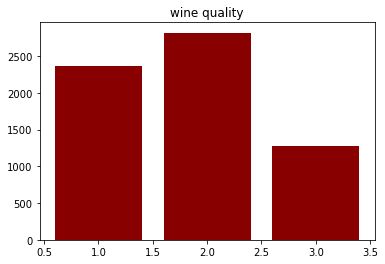

In [445]:
plt.title('wine quality')
plt.bar(target2.value_counts().index, target2.value_counts(), color='#880000')
plt.show()

In [446]:
target2.value_counts()

2    2820
1    2372
3    1271
Name: quality, dtype: int64

[1] 데이터 전처리

In [447]:
import random
randomIndex1 = [random.randint(0,2371) for value in range(0,1271)]
randomIndex2 = [random.randint(0,2819) for value in range(0,1271)]

In [448]:
data1 = winescaledDf[winescaledDf['quality']==1].reset_index().drop(columns='index').loc[randomIndex1].reset_index().drop(columns='index')
data2 = winescaledDf[winescaledDf['quality']==2].reset_index().drop(columns='index').loc[randomIndex2].reset_index().drop(columns='index')
data3 = winescaledDf[winescaledDf['quality']==3].reset_index().drop(columns='index')

In [503]:
winescaledDf = pd.concat([data1, data2, data3])
winescaledDf.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,6.9,0.440,0.18,11.8,0.051,26.0,126.0,0.99750,3.23,0.48,9.1,1
1,0,6.9,0.200,0.40,7.7,0.032,51.0,176.0,0.99390,3.22,0.27,11.4,1
2,1,6.4,0.640,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,1
3,1,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,1
4,1,7.2,0.340,0.24,2.0,0.071,30.0,52.0,0.99576,3.44,0.58,10.1,1


[2] 학습/테스트 데이터 준비

In [450]:
data = winescaledDf.iloc[:,:-1]
target = winescaledDf.quality

In [451]:
# 학습:8, 테스트:2
train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.2, random_state=42)

In [452]:
train_X.shape, test_X.shape

((3050, 12), (763, 12))

[3] 최적의 모델 찾기

In [456]:
models2 = all_estimators(type_filter='classifier')
scores2 = []
names2 = []

for name, model in models2:
    try:
        # 모델 객체 생성
        md = model()
        # 학습
        md.fit(train_X, train_y)
        # 평가
        result1 = md.score(train_X, train_y)
        result2 = md.score(test_X, test_y)
        names2.append(name)
        scores2.append((name, np.round(result1,3), np.round(result2,3)))
    except:
        pass

In [457]:
scoresDf2 = pd.DataFrame(scores2, columns=['model', 'train_score', 'test_score'])
scoresDf2.head()

,model,train_score,test_score
0,AdaBoostClassifier,0.619,0.573
1,BaggingClassifier,0.992,0.743
2,BernoulliNB,0.389,0.368
3,CalibratedClassifierCV,0.543,0.533
4,CategoricalNB,0.635,0.548


In [458]:
scoresDf2.sort_values(by='test_score', ascending=False).head(5)

,model,train_score,test_score
28,RandomForestClassifier,1.000,0.765
13,HistGradientBoostingClassifier,1.000,0.759
9,ExtraTreesClassifier,1.000,0.756
1,BaggingClassifier,0.992,0.743
8,ExtraTreeClassifier,1.000,0.717


- 랜덤포레스트 모델

[1] 모델 생성 및 학습

In [461]:
from sklearn.ensemble import RandomForestClassifier

rfModel = RandomForestClassifier()
rfModel.fit(train_X, train_y)

RandomForestClassifier()

[2] 모델 평가

In [462]:
print('train score: {}, test score: {}'.format(round(rfModel.score(train_X, train_y),3), round(rfModel.score(test_X, test_y),3)))

train score: 1.0, test score: 0.776


- 교차 검증

In [464]:
# 5-fold ~ 10-fold
for i in range(5,11):
    sSplitter = StratifiedKFold(n_splits = i, shuffle = True)
    allResult = cross_validate(rfModel, train_X, train_y, 
                            return_train_score=True, cv=sSplitter, return_estimator=True)
    resultDf = pd.DataFrame(allResult)
    print('{}-fold train score: {}, test_score: {}'.format(i, round(resultDf['train_score'].mean(),3), round(resultDf['test_score'].mean(),3)))

5-fold train score: 1.0, test_score: 0.728
6-fold train score: 1.0, test_score: 0.742
7-fold train score: 1.0, test_score: 0.745
8-fold train score: 1.0, test_score: 0.739
9-fold train score: 1.0, test_score: 0.75
10-fold train score: 1.0, test_score: 0.745


- 최적의 하이퍼파라미터 찾기

In [466]:
params = {'n_estimators': [30, 50, 100],
          'max_depth': [5, 10, 15],
          'max_features': [0.5, 1, 1.5]}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grid=params, cv=5, refit=True)
grid_rf.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': [0.5, 1, 1.5],
                         'n_estimators': [30, 50, 100]})

In [467]:
print('best parameters: {}'.format(grid_rf.best_params_))
print('best score: {}'.format(round(grid_rf.best_score_, 5)))
print('best estimator: {}'.format(grid_rf.best_estimator_))

best parameters: {'max_depth': 15, 'max_features': 1, 'n_estimators': 50}
best score: 0.73967
best estimator: RandomForestClassifier(max_depth=15, max_features=1, n_estimators=50)


- best parameters: {'max_depth': 15, 'max_features': 1, 'n_estimators': 50}

In [540]:
# 최적의 하이퍼파라미터로 학습
rerfModel = RandomForestClassifier(max_depth=15, max_features=1, n_estimators=50)
rerfModel.fit(train_X, train_y)

RandomForestClassifier(max_depth=15, max_features=1, n_estimators=50)

In [541]:
# 새로운 모델 평가
print('train score: {}, test score: {}'.format(round(rerfModel.score(train_X, train_y),3), round(rerfModel.score(test_X, test_y),3)))

train score: 0.995, test score: 0.752


방법 3. 품질 등급 2개 범주로 변환

[1] 데이터 전처리

In [572]:
winescaledDf2 = wineDf

In [573]:
# quilty -> 3~5:1, 6~9:2로 변환
winescaledDf2['quality'] = winescaledDf2['quality'].map({3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:2}).astype(int)

In [574]:
winescaledDf2['quality'].value_counts()

2    4091
1    2372
Name: quality, dtype: int64

In [582]:
import random
randomIndex = [random.randint(0,4090) for value in range(0,2372)]

In [583]:
data1 = winescaledDf2[winescaledDf2['quality']==1].reset_index().drop(columns='index')
data2 = winescaledDf2[winescaledDf2['quality']==2].reset_index().drop(columns='index').loc[randomIndex].reset_index().drop(columns='index')

In [584]:
winescaledDf2 = pd.concat([data1, data2])
winescaledDf2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,1
1,0,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,1
2,0,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,1
3,0,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.0002,2.98,0.67,9.7,1
4,0,6.5,0.31,0.14,7.50,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,1


In [586]:
data = winescaledDf2.iloc[:,:-1]
target = winescaledDf2.quality

[2] 학습/테스트 데이터 분리

In [587]:
# 학습:8, 테스트:2
train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.2, random_state=42)

In [588]:
train_X.shape, test_X.shape

((3795, 12), (949, 12))

[3] 최적의 모델 찾기

In [591]:
models3 = all_estimators(type_filter='classifier')
scores3 = []
names3 = []

for name, model in models3:
    try:
        # 모델 객체 생성
        md = model()
        # 학습
        md.fit(train_X, train_y)
        # 평가
        result1 = md.score(train_X, train_y)
        result2 = md.score(test_X, test_y)
        names3.append(name)
        scores3.append((name, np.round(result1,3), np.round(result2,3)))
    except:
        pass

In [592]:
scoresDf3 = pd.DataFrame(scores3, columns=['model', 'train_score', 'test_score'])
scoresDf3.head()

,model,train_score,test_score
0,AdaBoostClassifier,0.755,0.727
1,BaggingClassifier,0.991,0.846
2,BernoulliNB,0.551,0.551
3,CalibratedClassifierCV,0.710,0.702
4,CategoricalNB,0.726,0.691


In [594]:
scoresDf3.sort_values(by='test_score', ascending=False).head(10)

,model,train_score,test_score
28,RandomForestClassifier,1.000,0.858
9,ExtraTreesClassifier,1.000,0.855
1,BaggingClassifier,0.991,0.846
13,HistGradientBoostingClassifier,0.956,0.825
8,ExtraTreeClassifier,1.000,0.807
6,DecisionTreeClassifier,1.000,0.796
15,LabelPropagation,1.000,0.781
16,LabelSpreading,1.000,0.780
11,GaussianProcessClassifier,0.994,0.773
12,GradientBoostingClassifier,0.811,0.768


- 랜덤포레스트 모델

[1] 모델 생성 및 학습

In [906]:
rfModel2 = RandomForestClassifier()
rfModel2.fit(train_X, train_y)

RandomForestClassifier()

[2] 평가

In [908]:
print('train score: {}, test score: {}'.format(round(rfModel2.score(train_X, train_y),3), round(rfModel2.score(test_X, test_y),3)))

train score: 1.0, test score: 0.868


- 최적의 하이퍼파라미터 찾기

In [718]:
params = {'n_estimators': [30, 50, 100],
          'max_leaf_nodes': [100, 130, 150],
          'max_depth': [5, 7, 10],
          'max_features': [0.5, 0.7, 1],
          'min_samples_split': [3, 5]}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grid=params, cv=5, refit=True)
grid_rf.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [0.5, 0.7, 1],
                         'max_leaf_nodes': [100, 130, 150],
                         'min_samples_split': [3, 5],
                         'n_estimators': [30, 50, 100]})

In [719]:
print('best parameters: {}'.format(grid_rf.best_params_))
print('best score: {}'.format(round(grid_rf.best_score_, 5)))
print('best estimator: {}'.format(grid_rf.best_estimator_))

best parameters: {'max_depth': 10, 'max_features': 0.5, 'max_leaf_nodes': 150, 'min_samples_split': 5, 'n_estimators': 100}
best score: 0.8087
best estimator: RandomForestClassifier(max_depth=10, max_features=0.5, max_leaf_nodes=150,
                       min_samples_split=5)


In [909]:
rerfModel2 = RandomForestClassifier(max_depth=8, max_features=0.5, min_samples_split=6, min_samples_leaf=6,
                                  n_estimators=100, max_leaf_nodes=80, random_state=42)
rerfModel2.fit(train_X, train_y)

RandomForestClassifier(max_depth=8, max_features=0.5, max_leaf_nodes=80,
                       min_samples_leaf=6, min_samples_split=6,
                       random_state=42)

In [911]:
print('train score: {}, test score: {}'.format(round(rerfModel2.score(train_X, train_y),3), round(rerfModel2.score(test_X, test_y),3)))

train score: 0.854, test score: 0.801


- 혼동 행렬

In [912]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rerfModel2.predict(test_X)
ac = accuracy_score(test_y, y_pred)
cm = confusion_matrix(test_y, y_pred)

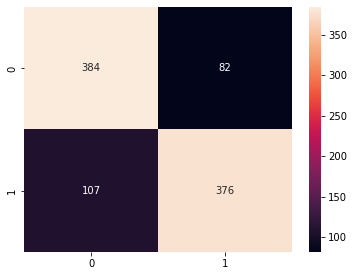

In [913]:
import seaborn as sns

plt.figure(figsize=(6,4.5))
sns.heatmap(cm, annot = True, fmt='d')
plt.show()

- 예측
-> test 데이터에서 랜덤으로 데이터 10개 뽑아서 씀

In [914]:
for _ in range(10):
    index = random.randint(0,949)
    print('예측 품질 등급: {}, 실제 품질 등급: [{}]'.format(rerfModel2.predict([test_X.iloc[index]]), test_y.iloc[index]))

예측 품질 등급: [1], 실제 품질 등급: [1]
예측 품질 등급: [1], 실제 품질 등급: [1]
예측 품질 등급: [1], 실제 품질 등급: [1]
예측 품질 등급: [1], 실제 품질 등급: [1]
예측 품질 등급: [2], 실제 품질 등급: [2]
예측 품질 등급: [2], 실제 품질 등급: [2]
예측 품질 등급: [2], 실제 품질 등급: [1]
예측 품질 등급: [1], 실제 품질 등급: [2]
예측 품질 등급: [2], 실제 품질 등급: [2]
예측 품질 등급: [1], 실제 품질 등급: [1]
